This tutorial shows how to calculate noise for a time series using pyNA.

pyNA enables noise calculations in both python and julia. Select the preferred code language by setting the environment variable **before importing the pyna package**: 

``os.environ['pyna_language'] = 'python'``

``os.environ['pyna_language'] = 'julia'``

The inputs to the code are two excel sheets:
  - trajectory parameters
  - engine parameters

Follow the following steps: 

  1) load the standard settings for the nasa stca vehicle
    
  2) create a pyNA object
    
  3) call the ``pyna.compute_noise_time_series()`` method
    
Finally, the ``py.plot_noise_time_series()`` method plots the noise at the two certification microphones, for a selected noise metric (here: pnlt).



In [1]:
# Imports 
import os
import pdb
import numpy as np
import openmdao.api as om
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

os.environ["pyna_language"] = 'julia'
from pyNA.pyna import pyna

In [21]:
# Load default pyna settings
pyna_settings = pyna.load_settings(case_name ='nasa_stca_standard')

pyna_settings.all_sources = True

pyna_settings.absorption = True
pyna_settings.groundeffects = True
pyna_settings.suppression = True
pyna_settings.hsr_calibration = True
pyna_settings.validation = True
pyna_settings.lateral_attenuation = True

pyna_settings.engine_mounting = 'none'

# pyna_settings.x_observer_array = np.array([[500., 450., 4*0.3048], [1000., 450., 4*0.3048]])

# Start pyna
py = pyna(settings=pyna_settings)

# Compute noise
py.compute_noise_time_series()


/Users/laurensvoet/Library/Python/3.7/lib/python/site-packages/openmdao/recorders/sqlite_recorder.py:224: UserWarning:The existing case recorder file, /Users/laurensvoet/Documents/Research/pyNA/pyNA/cases/nasa_stca_standard/dymos_solution.db, is being overwritten.


Model viewer data has already has already been recorded for Driver.


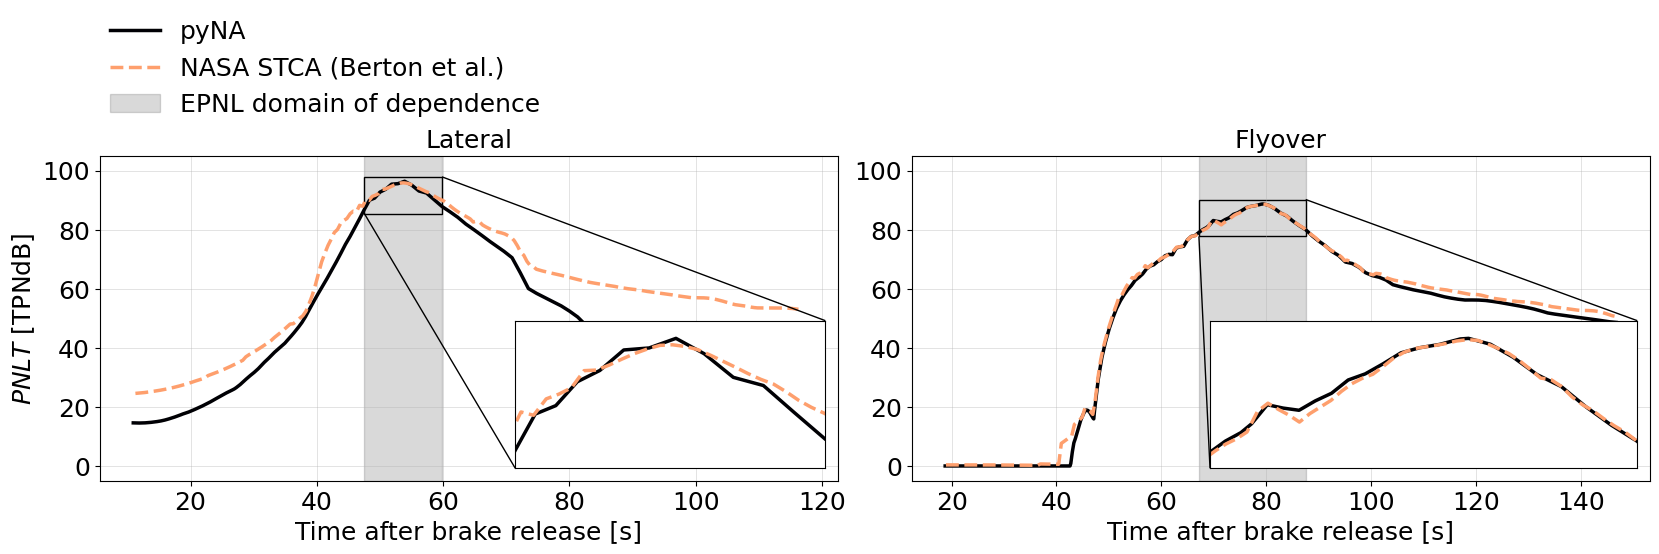

In [22]:
# Plot results
py.plot_noise_time_series(metric='pnlt')

In [5]:
plt.plot(py.problem.get_val('noise.geometry.beta')[0,:])

KeyError: '<model> <class Group>: Variable "noise.geometry.beta" not found.'